<center><h1>Preliminary analysis of Strava HRM data</h1></center>

In [1]:
.libPaths("~/R/x86_64-redhat-linux-gnu-library/3.2/")
options(jupyter.plot_mimetypes = 'image/png')

In [2]:
library(XML)
library(dplyr)
library(ggplot2)
library(lubridate)
library(reshape2)
library(ggmap)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [121]:
# get list of all GPX files
tracks = list.files("/g/steinmetz/brooks/ph/data/strava/", full.names = T)
existing_data = tracks[grep("^strava(*).*RData",
                            list.files("/g/steinmetz/brooks/ph/data/strava/"))]
# limit to running tracks
tracks = tracks[grep("Run",tracks)]

In [129]:
override = F

if ( (override) && (file.exists(existing_data)) ) {
    if (override) {
        file.remove(existing_data)
    }
    data = do.call(rbind, lapply(tracks, function(f){
    o = try({
        # Parse the GPX file
        pfile = htmlTreeParse(f, useInternalNodes = T)
        # Get all elevations, times coordinates, and heart rate via the respective xpath
        elevations <- as.numeric(xpathSApply(pfile, path = "//trkpt/ele", xmlValue))
        times <- xpathSApply(pfile, path = "//trkpt/time", xmlValue)
        coords <- xpathSApply(pfile, path = "//trkpt", xmlAttrs)
        hr <- as.numeric(xpathSApply(pfile, path = "//trkpt/extensions", xmlValue))
        # Extract latitude and longitude from the coordinates
        lats <- as.numeric(coords["lat",])
        lons <- as.numeric(coords["lon",])
        # Put everything in a dataframe and get rid of old variables
        data.frame(lat = lats, lon = lons, ele = elevations, time = times, hr = hr)
    })
    if (class(o) != "try-error") {
        return(o)
    } else {
        return(NULL)
    }
    }))
    save(data, 
         file = paste("/g/steinmetz/brooks/ph/data/strava/strava-", Sys.Date(), ".RData",sep = ""))
} else {
    load(existing_data)
}

In [242]:
head(data)

lat       lon ele                 time hr
1 47.62346 -122.3384 -41 2014-07-25T03:52:44Z 76
2 47.62344 -122.3385 -41 2014-07-25T03:52:45Z 78
3 47.62344 -122.3385 -41 2014-07-25T03:52:46Z 83
4 47.62344 -122.3385 -41 2014-07-25T03:52:47Z 85
5 47.62345 -122.3386 -41 2014-07-25T03:52:48Z 87
6 47.62345 -122.3386 -41 2014-07-25T03:52:49Z 88

In [279]:
hd = c(lon = 8.75, lat = 49.4)
sea = c(lon = -122.33, lat = 47.65)
enchanments = c(lon = -120.82, lat = 47.5)

In [266]:
# reference for one line
# hd <- c(left = HD_left, bottom = HD_bottom, right = HD_right, top = HD_top)
# map <- get_map(hd, maptype = "terrain")
# ggmap(map) + 
#     geom_point(data = geodf[1:1000,], aes(x = lon, y = lat, color = hr, size = ele), 
#                alpha = .5) +
#     scale_colour_gradient("Heart Rate", low = "white", high = "red") +
#     scale_size("Elevation", range = c(0, 3))

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=47.65,-122.33&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 103632 rows containing non-finite values (stat_density2d).

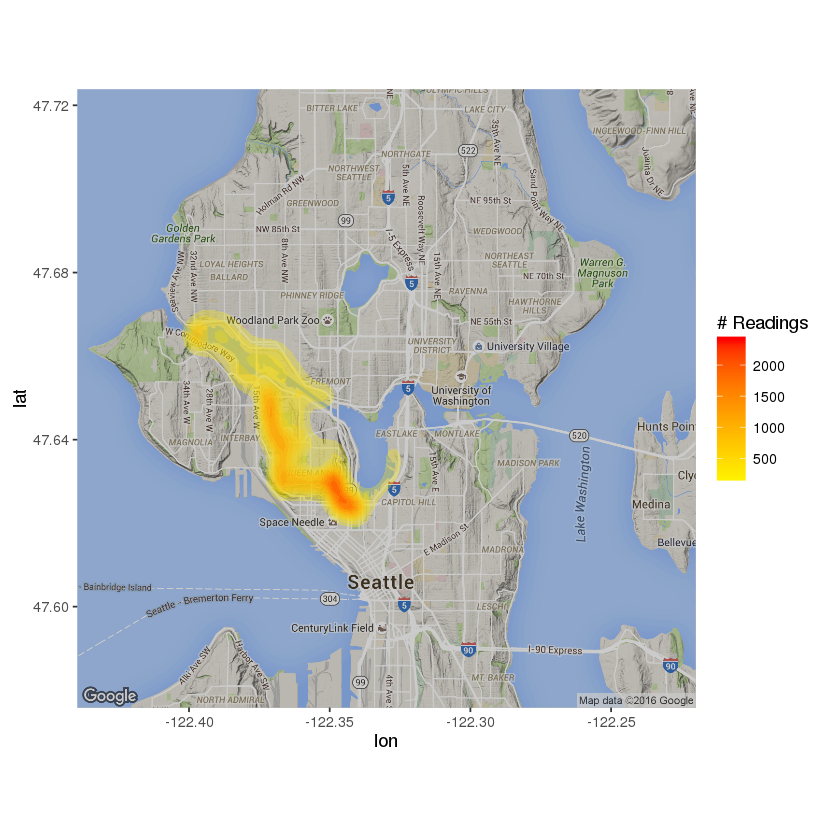

In [267]:
map <- get_map(sea, maptype = "terrain", zoom = 12)
ggmap(map, darken = 0.2) + 
    stat_density_2d(data = data, aes(x = lon, y = lat, fill = ..level..), 
                    geom = "polygon", alpha = .3) +
    scale_fill_gradient2("# Readings", low = "white", mid = "yellow", high = "red")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=47.65,-122.33&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 86038 rows containing non-finite values (stat_density2d).

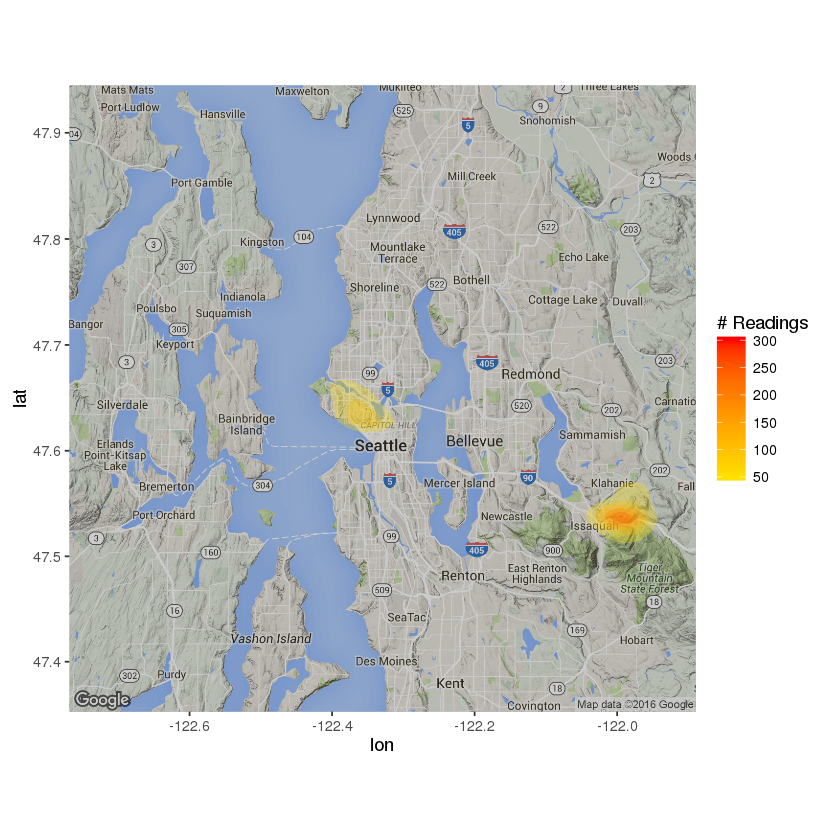

In [268]:
map <- get_map(sea, maptype = "terrain", zoom = 10)
ggmap(map, darken = 0.2) + 
    stat_density_2d(data = data, aes(x = lon, y = lat, fill = ..level..), 
                    geom = "polygon", alpha = .3) +
    scale_fill_gradient2("# Readings", low = "white", mid = "yellow", high = "red")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=47.65,-122.33&zoom=7&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 64645 rows containing non-finite values (stat_density2d).

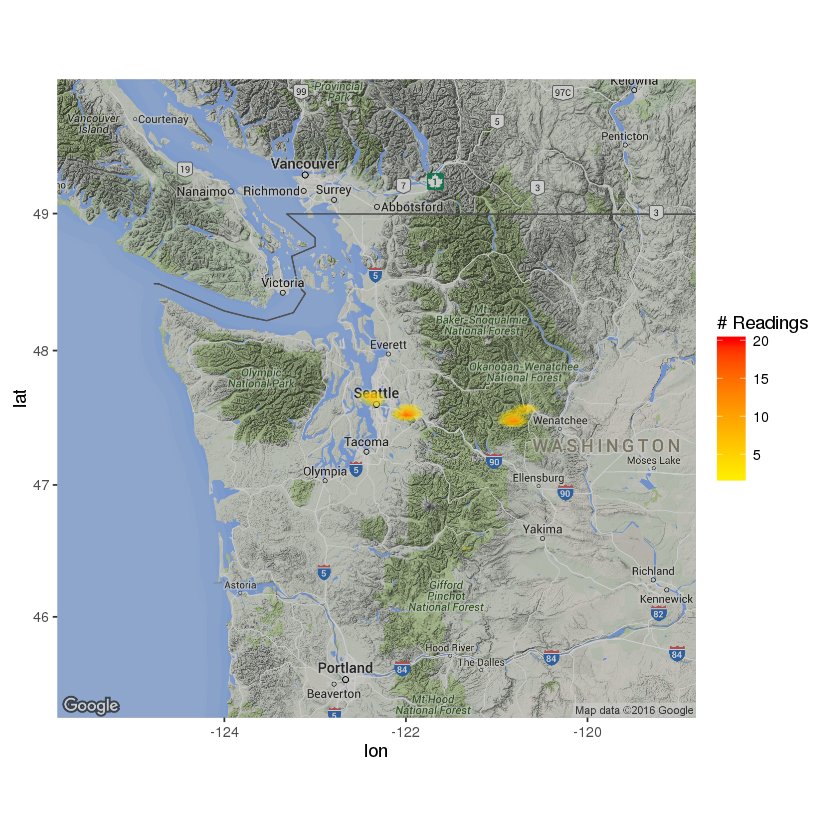

In [269]:
map <- get_map(sea, maptype = "terrain", zoom = 7)
ggmap(map, darken = 0.2) + 
    stat_density_2d(data = data, aes(x = lon, y = lat, fill = ..level..), 
                    geom = "polygon", alpha = .3) +
    scale_fill_gradient2("# Readings", low = "white", mid = "yellow", high = "red")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=47.5,-120.82&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 99423 rows containing non-finite values (stat_density2d).

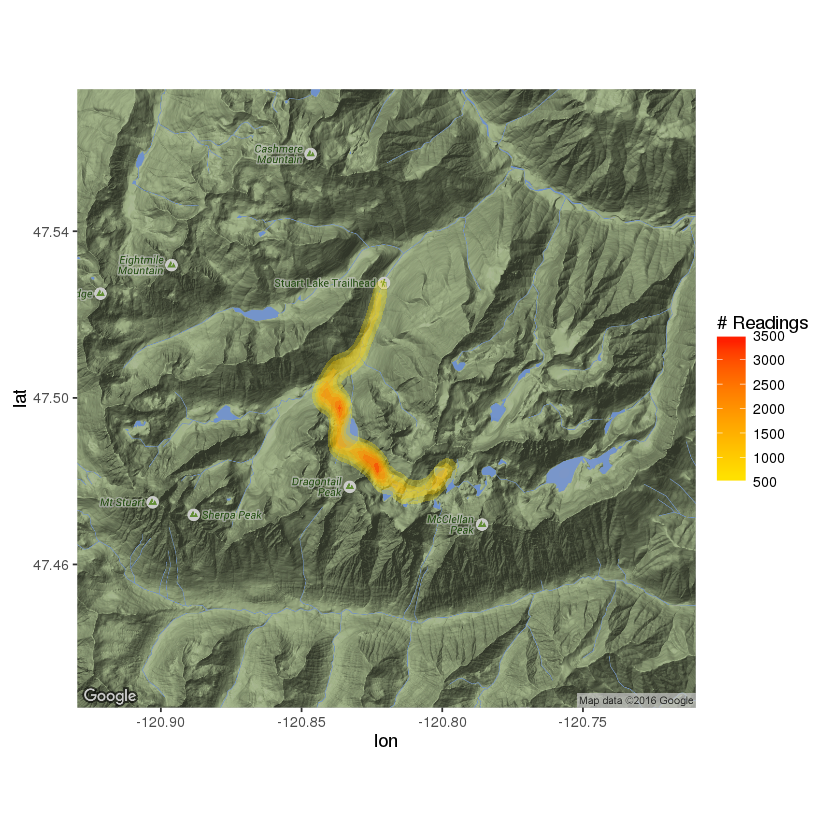

In [280]:
map <- get_map(enchanments, maptype = "terrain", zoom = 12)
ggmap(map, darken = 0.2) + 
    stat_density_2d(data = data, aes(x = lon, y = lat, fill = ..level..), 
                    geom = "polygon", alpha = .3) +
    scale_fill_gradient2("# Readings", low = "white", mid = "yellow", high = "red")

<img src="http://goo.gl/photos/7BByLZEffkJJuZ5n6">

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=49.4,8.75&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 53364 rows containing non-finite values (stat_density2d).

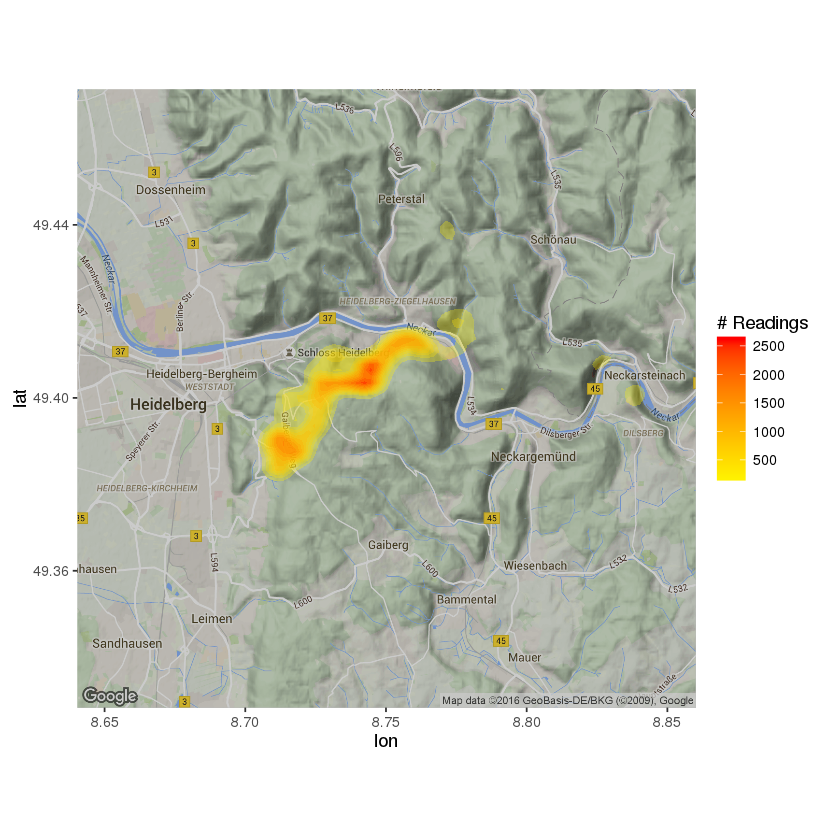

In [277]:
map <- get_map(hd, maptype = "terrain", zoom = 12)
ggmap(map, darken = 0.2) + 
    stat_density_2d(data = data, aes(x = lon, y = lat, fill = ..level..), 
                    geom = "polygon", alpha = .3) +
    scale_fill_gradient2("# Readings", low = "white", mid = "yellow", high = "red")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=49.39,8.75&zoom=6&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 53364 rows containing non-finite values (stat_density2d).

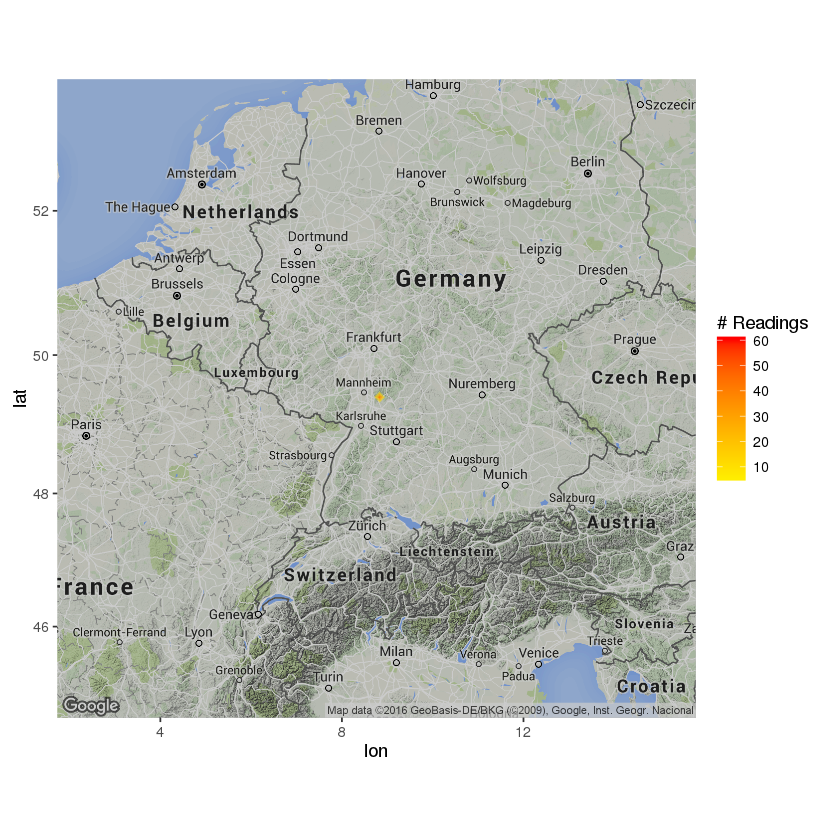

In [275]:
map <- get_map(hd, maptype = "terrain", zoom = 6)
ggmap(map, darken = 0.2) + 
    stat_density_2d(data = data, aes(x = lon, y = lat, fill = ..level..), 
                    geom = "polygon", alpha = .2) +
    scale_fill_gradient2("# Readings", low = "white", mid = "yellow", high = "red")

Warning message:
: bounding box given to google - spatial extent only approximate.converting bounding box to center/zoom specification. (experimental)
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=49.4,8.75&zoom=13&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 1000 rows containing missing values (geom_point).

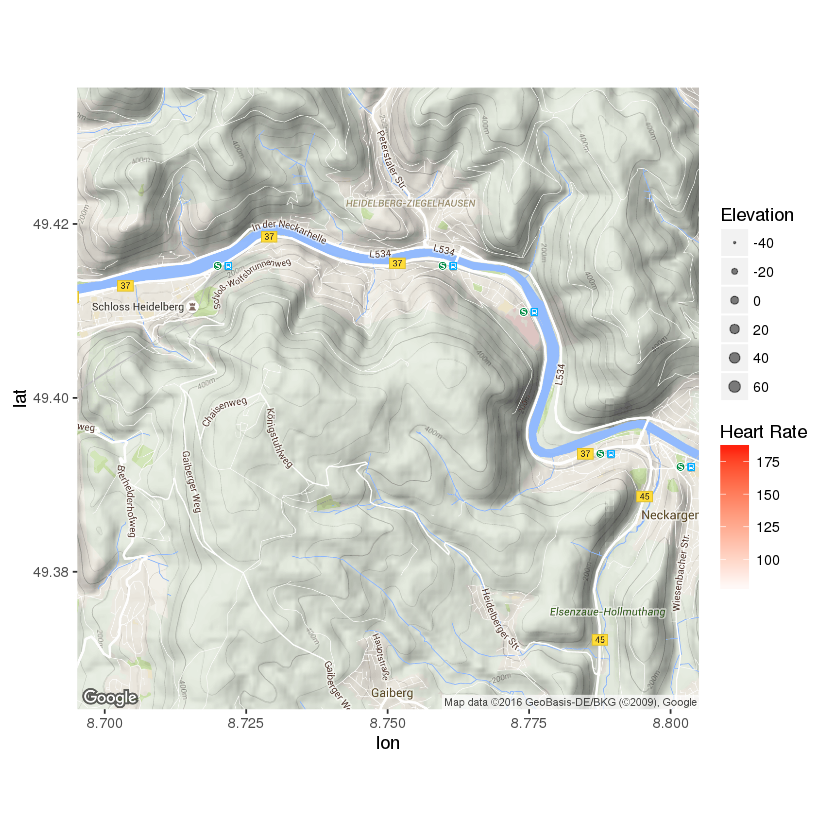

In [192]:
map <- get_map(hd, maptype = "terrain")
ggmap(map) + 
    geom_point(data = data, aes(x = lon, y = lat, color = hr, size = ele), 
               alpha = .5) +
    scale_colour_gradient("Heart Rate", low = "white", high = "red") +
    scale_size("Elevation", range = c(0, 3))